<a href="https://colab.research.google.com/github/raeubaen/ml/blob/master/Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#LIBRERIE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from IPython.display import Image
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image

In [0]:
!wget https://www.dropbox.com/s/3a353h7w31sr5g1/train.zip?dl=0
!wget https://www.dropbox.com/s/yrau8vva5rqhepd/test.zip?dl=0
!mv train.zip?dl=0 train.zip
!mv test.zip?dl=0 test.zip
!unzip test.zip
!unzip train.zip
!rm test.zip
!rm train.zip

In [0]:
train_AD = expand_dims(np.array([np.array(Image.open(fname)) for fname in glob.glob('train/AD/*.jpg')]),3)
train_HC = expand_dims(np.array([np.array(Image.open(fname)) for fname in glob.glob('train/HC/*.jpg')]),3)
train_c_MCI = expand_dims(np.array([np.array(Image.open(fname)) for fname in glob.glob('train/c-MCI/*.jpg')]),3)
train_s_MCI = expand_dims(np.array([np.array(Image.open(fname)) for fname in glob.glob('train/s-MCI/*.jpg')]),3)

test_AD = np.array([np.array(Image.open(fname)) for fname in glob.glob('test/AD/*.jpg')])
test_HC = np.array([np.array(Image.open(fname)) for fname in glob.glob('test/HC/*.jpg')])
test_c_MCI = np.array([np.array(Image.open(fname)) for fname in glob.glob('test/c-MCI/*.jpg')])
test_s_MCI = np.array([np.array(Image.open(fname)) for fname in glob.glob('test/s-MCI/*.jpg')])

In [0]:
np.random.seed(1234)
rndperm = np.random.permutation(train_HC.shape[0])
train_HC = train_HC[rndperm]
train_HC = train_HC[0:52,:,:,:]
#rndperm1 = np.random.permutation(train_s_MCI.shape[0])
#train_s_MCI = train_s_MCI[rndperm1]
#train_s_MCI = train_HC[0:100,:,:,:]

In [0]:
train_AD_Augmented = train_AD[0]
train_AD_Augmented = expand_dims(train_AD_Augmented, 0)
train_HC_Augmented = train_HC[0]
train_HC_Augmented = expand_dims(train_HC_Augmented, 0)

In [0]:
datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,vertical_flip=True)

for i in range(50):
  batch = datagen.flow(train_AD, batch_size=train_AD.shape[0]).next()
  train_AD_Augmented = np.append(train_AD_Augmented,batch,axis=0)

for i in range(1):
  batch = datagen.flow(train_HC, batch_size=train_HC.shape[0]).next()
  train_HC_Augmented = np.append(train_HC_Augmented,batch,axis=0)

In [0]:
train_AD = train_AD_Augmented
train_HC = train_HC_Augmented

In [0]:
#creo le label
label_AD = np.ones(train_AD.shape[0])*1
label_c_MCI = np.ones(train_c_MCI.shape[0])*1
label_s_MCI = np.ones(train_s_MCI.shape[0])*2
label_HC = np.ones(train_HC.shape[0])*0

index_AD = np.ones(test_AD.shape[0])*1
index_c_MCI = np.ones(test_c_MCI.shape[0])*1
index_s_MCI = np.ones(test_s_MCI.shape[0])*2
index_HC = np.ones(test_HC.shape[0])*0

#creo le classificazioni binarie
class_1 = np.concatenate((train_AD, train_HC),axis=0)
class_1.shape
label_1 = np.concatenate((label_AD, label_HC),axis=0)
label_1.shape

class_2 = np.concatenate((train_s_MCI, train_HC),axis=0)
class_2.shape
label_2 = np.concatenate((label_s_MCI, label_HC),axis=0)
label_2.shape

(1845,)

In [0]:
#randomizziamo i dati 
np.random.seed(1234)
rndperm = np.random.permutation(class_2.shape[0])
class_2 = class_2[rndperm,:,:,:]
label_2 = label_2[rndperm]

In [0]:
#label_1 = keras.utils.to_categorical(label_1)

(4352, 208, 176, 1)

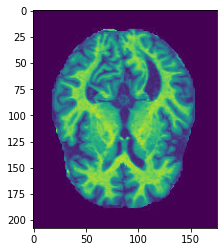

In [0]:
plt.imshow(class_1[2784,:,:,0])

Model: "my_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 208, 176, 1)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 208, 176, 1)       0         
_________________________________________________________________
DataAugm (Sequential)        (None, 208, 176, 1)       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 204, 172, 50)      1300      
_________________________________________________________________
ReLU_dense_1 (ReLU)          (None, 204, 172, 50)      0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 100, 84, 50)       62550     
_________________________________________________________________
ReLU_dense_2 (ReLU)          (None, 100, 84, 50)       0    

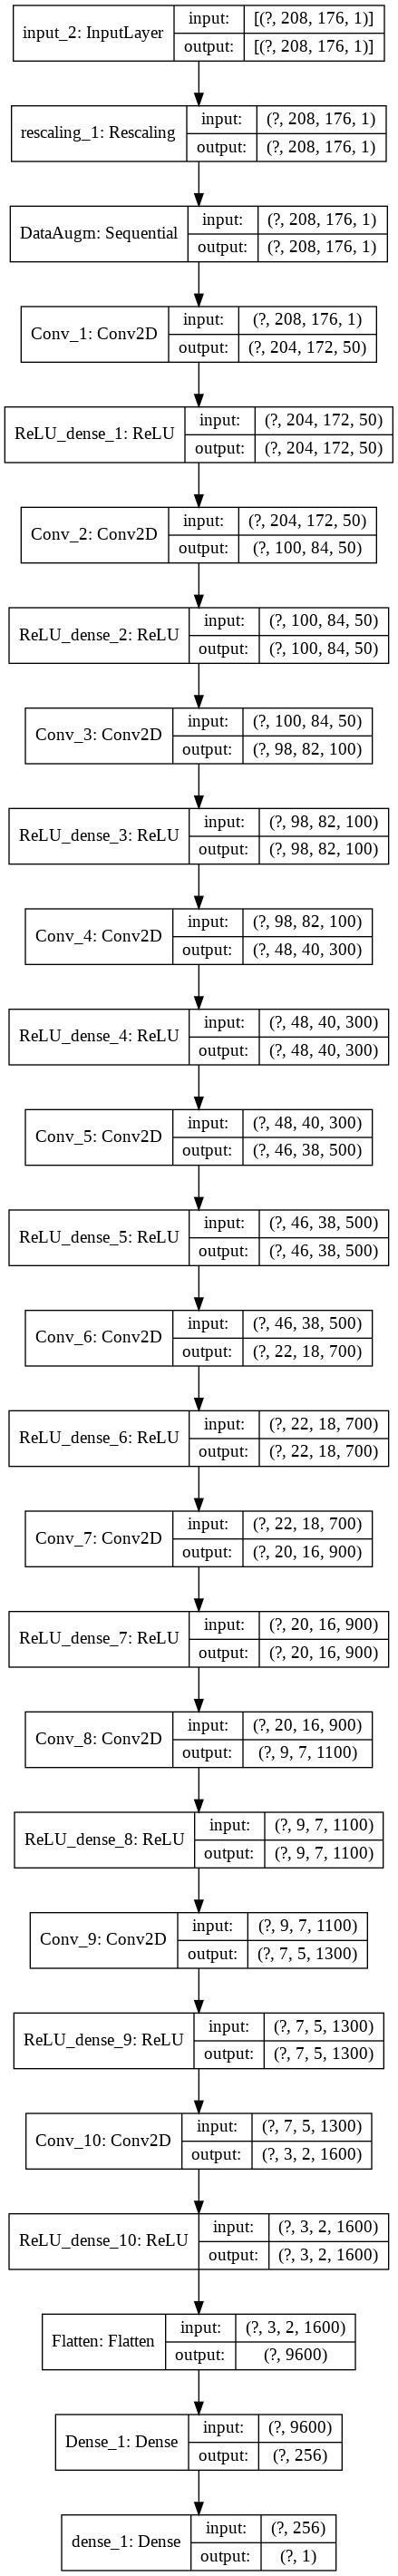

In [0]:
# COSTRUZIONE DI UNA RETE NEURALE

inputs = keras.Input(shape=(208,176,1))   #ATTENZIONE ALLA DIMENSIONE DELL'INPUT
# INPUT
x = inputs
x = layers.experimental.preprocessing.Rescaling(1.0/255)(inputs)
data_augmentation = keras.Sequential([keras.layers.experimental.preprocessing.RandomFlip()], name='DataAugm')
x = data_augmentation(x)

# BLOCCHI CONVOLUZIONALI
# primi 2 blocchi Convoluzionali
x = keras.layers.Conv2D(50, kernel_size=(5,5), name='Conv_1', strides=(1,1))(x)
x = keras.layers.ReLU(name='ReLU_dense_1')(x)
x = keras.layers.Conv2D(50, kernel_size=(5,5), name='Conv_2', strides=(2,2))(x)
x = keras.layers.ReLU(name='ReLU_dense_2')(x)

# 10 blocchi convoluzionali
x = keras.layers.Conv2D(100, kernel_size=(3,3), name='Conv_3', strides=(1,1))(x)
x = keras.layers.ReLU(name='ReLU_dense_3')(x)
x = keras.layers.Conv2D(300, kernel_size=(3,3), name='Conv_4', strides=(2,2))(x)
x = keras.layers.ReLU(name='ReLU_dense_4')(x)
x = keras.layers.Conv2D(500, kernel_size=(3,3), name='Conv_5', strides=(1,1))(x)
x = keras.layers.ReLU(name='ReLU_dense_5')(x)
x = keras.layers.Conv2D(700, kernel_size=(3,3), name='Conv_6', strides=(2,2))(x)
x = keras.layers.ReLU(name='ReLU_dense_6')(x)
x = keras.layers.Conv2D(900, kernel_size=(3,3), name='Conv_7', strides=(1,1))(x)
x = keras.layers.ReLU(name='ReLU_dense_7')(x)
x = keras.layers.Conv2D(1100, kernel_size=(3,3), name='Conv_8', strides=(2,2))(x)
x = keras.layers.ReLU(name='ReLU_dense_8')(x)
x = keras.layers.Conv2D(1300, kernel_size=(3,3), name='Conv_9', strides=(1,1))(x)
x = keras.layers.ReLU(name='ReLU_dense_9')(x)
x = keras.layers.Conv2D(1600, kernel_size=(3,3), name='Conv_10', strides=(2,2))(x)
#x = keras.layers.Conv2D(100, kernel_size=(3,3), name='Conv_11', strides=(1,1))(x)
#x = keras.layers.Conv2D(100, kernel_size=(3,3), name='Conv_12', strides=(2,2))(x)

# layer di attivazione
x = keras.layers.ReLU(name='ReLU_dense_10')(x)

# APPIATTIMENTO
x = keras.layers.Flatten(name='Flatten')(x)

# RETE DENSA
x = keras.layers.Dense(256, name='Dense_1')(x)
outputs = keras.layers.Dense(1, activation='softmax')(x)

#definizione del modello
model = keras.Model(inputs=inputs, outputs=outputs, name='my_CNN')

#printout il summary del modello
model.summary()

# struttura el modello
keras.utils.plot_model(model, show_shapes=True)

In [0]:
#COMPILAZIONE
LR_ST=1e-3
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR_ST)
METRIC = tf.keras.metrics.SensitivityAtSpecificity(0.5)
EAGERLY = False
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=EAGERLY)  #cambiare loss

In [0]:
# TRAINING
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath='mycnn_best', 
                                                   save_weights_only=True, 
                                                   save_best_only=True, 
                                                   save_freq='epoch')

callbacks = [ model_checkpoint ]
#callbacks = [ lr_scheduler, model_checkpoint ]

history = model.fit(class_2,label_2, epochs=20, validation_split=0.2,batch_size=64, shuffle=True, verbose=1,callbacks=callbacks)

Epoch 1/20
24/24 [==============================] - 42s 2s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 2/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 3/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 4/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 5/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 6/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accuracy: 0.0000e+00 - val_loss: -14.0921 - val_accuracy: 0.0000e+00
Epoch 7/20
24/24 [==============================] - 35s 1s/step - loss: -14.4434 - accur

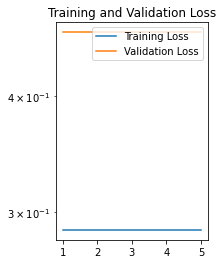

Text(0.5, 1.0, 'Training and Validation Accuracy')

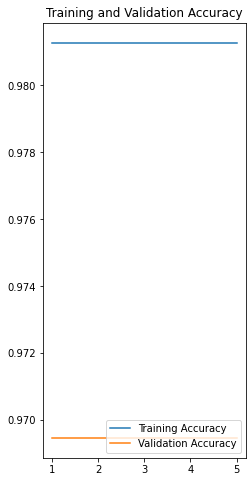

In [0]:
# ANDAMENTI LOSS E VALIDATION_LOSS
acc = history.history['sensitivity_at_specificity_2']
val_acc = history.history['val_sensitivity_at_specificity_2']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(1, len(loss) + 1)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yscale("log")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [0]:
# ANALISI DELLE PRESTAZIONI

#creo le classificazioni binarie
test_AD_HC = np.concatenate((test_AD, test_HC),axis=0)
target_AD_HC = np.concatenate((index_AD, index_HC),axis=0)
#randomizziamo i dati 
np.random.seed(1234)
rndperm = np.random.permutation(test_AD_HC.shape[0])
test_AD_HC = test_AD_HC[rndperm,:,:]
target_AD_HC = target_AD_HC[rndperm]

#unique, counts = np.unique(target_AD_HC, return_counts=True)
total_AD = test_AD.shape[0]
total_HC = test_HC.shape[0]
position_AD = np.where(target_AD_HC == 1)
position_HC = np.where(target_AD_HC == 0)

prediction = model.predict(test_AD_HC)

correct_AD = np.asarray(np.where(prediction[position_AD][:] > 0.5)).shape[1]
correct_HC = np.asarray(np.where(prediction[position_HC][:] > 0.5)).shape[1]

sensitivity = correct_AD/total_AD
specificity = correct_HC/total_HC
accuracy = (correct_AD+correct_HC)/test_AD_HC.shape[0]

print("sensitivity = ", sensitivity,"\n specificity = ",specificity,"\n accuracy = ",accuracy)



sensitivity =  1.0 
 specificity =  1.0 
 accuracy =  1.0


In [0]:
prediction

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Model: "my_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 208, 176, 1)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 208, 176, 1)       0         
_________________________________________________________________
DataAugm (Sequential)        (None, 208, 176, 1)       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 206, 174, 32)      320       
_________________________________________________________________
ReLU_1 (ReLU)                (None, 206, 174, 32)      0         
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 103, 87, 32)       0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 101, 85, 64)       18496

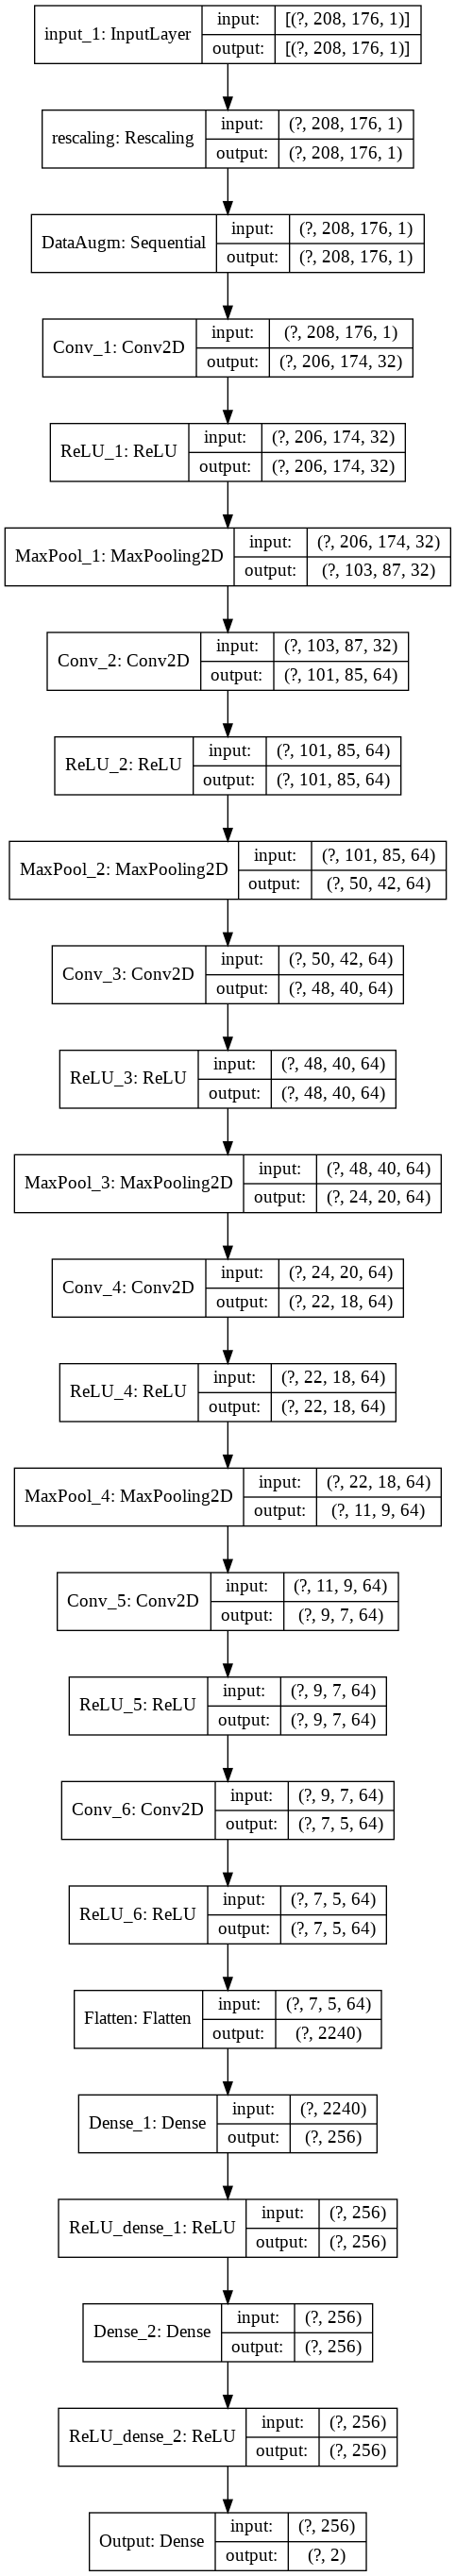

In [0]:
# COSTRUZIONE DI UNA RETE NEURALE

inputs = keras.Input(shape=(208,176,1))   #ATTENZIONE ALLA DIMENSIONE DELL'INPUT
# INPUT
x = inputs
x = layers.experimental.preprocessing.Rescaling(1.0/255)(inputs)
data_augmentation = keras.Sequential([keras.layers.experimental.preprocessing.RandomFlip()], name='DataAugm')
x = data_augmentation(x)
# BLOCCHI CONVOLUZIONALI
# primo blocco Convoluzionale
x = keras.layers.Conv2D(32, kernel_size=(3,3), name='Conv_1')(x)
x = keras.layers.ReLU(name='ReLU_1')(x)
x = keras.layers.MaxPool2D((2,2), name='MaxPool_1')(x)

# secondo blocco convoluzionale
x = keras.layers.Conv2D(64, kernel_size=(3,3), name='Conv_2')(x)
x = keras.layers.ReLU(name='ReLU_2')(x)
x = keras.layers.MaxPool2D((2,2), name='MaxPool_2')(x)

# secondo blocco convoluzionale
x = keras.layers.Conv2D(64, kernel_size=(3,3), name='Conv_3')(x)
x = keras.layers.ReLU(name='ReLU_3')(x)
x = keras.layers.MaxPool2D((2,2), name='MaxPool_3')(x)

# secondo blocco convoluzionale
x = keras.layers.Conv2D(64, kernel_size=(3,3), name='Conv_4')(x)
x = keras.layers.ReLU(name='ReLU_4')(x)
x = keras.layers.MaxPool2D((2,2), name='MaxPool_4')(x)

# secondo blocco convoluzionale
x = keras.layers.Conv2D(64, kernel_size=(3,3), name='Conv_5')(x)
x = keras.layers.ReLU(name='ReLU_5')(x)
#x = keras.layers.MaxPool2D((2,2), name='MaxPool_5')(x)
# terzo blocco convoluzionale (non applichiamo il maxpooling per non ridurre 
# troppo la dimensione dell'output x)
x = keras.layers.Conv2D(64, kernel_size=(3,3), name='Conv_6')(x)
x = keras.layers.ReLU(name='ReLU_6')(x)

# APPIATTIMENTO
x = keras.layers.Flatten(name='Flatten')(x)

# RETE DENSA
x = keras.layers.Dense(256, name='Dense_1')(x)
x = keras.layers.ReLU(name='ReLU_dense_1')(x)
x = keras.layers.Dense(256, name='Dense_2')(x)
x = keras.layers.ReLU(name='ReLU_dense_2')(x)
outputs = keras.layers.Dense(2, name='Output')(x)  #mettere numero di label

#definizione del modello
model = keras.Model(inputs=inputs, outputs=outputs, name='my_CNN')

#printout il summary del modello
model.summary()

# struttura el modello
keras.utils.plot_model(model, show_shapes=True)